In [ ]:
from zipfile import ZipFile
name = "dataset.zip"


with ZipFile(name, 'r') as zpp:
  zpp.extractall()
  print("Done")

Done


In [ ]:
import keras 
from keras.models  import Sequential 
from keras.layers import Activation , Dropout
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import ModelCheckpoint
from matplotlib import pyplot as plt
import  numpy as np  
import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline

Using TensorFlow backend.


In [ ]:
import os

train_path =os.path.join('/content/dataset/train') 
test_path = os.path.join('/content/dataset/test')
valid_path = os.path.join('/content/dataset/valid')


In [ ]:
train_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=train_path, target_size=(100,100), classes=['with mask', 'without mask'])
valid_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=valid_path, target_size=(100,100), classes=['with mask', 'without mask'])
test_batches = ImageDataGenerator(rescale=1./255).flow_from_directory(directory=test_path, target_size=(100,100),classes=['with mask', 'without mask'], shuffle=False)

Found 1341 images belonging to 2 classes.
Found 59 images belonging to 2 classes.
Found 58 images belonging to 2 classes.


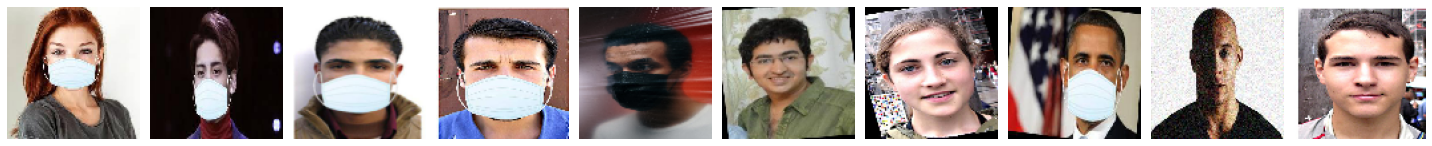

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [ ]:
imgs, labels = next(train_batches)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(imgs)
print(labels)

In [ ]:
model  = Sequential([
                     Conv2D(200, (3,3), input_shape = (100,100,3), activation = 'relu'),
                     MaxPooling2D(pool_size = (2,2), strides = 1),
                     Conv2D(100 , (3,3), activation = 'relu'),
                     MaxPooling2D(pool_size= (2,2)),
                     Flatten(),
                     Dropout(0.5),
                     Dense(50, activation = 'relu'),
                     Dense(2, activation = 'softmax')

])


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 98, 98, 200)       5600      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 97, 97, 200)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 95, 95, 100)       180100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 47, 47, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 220900)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 220900)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)               

In [ ]:
model.compile(Adam(learning_rate = 0.0001) , loss = 'categorical_crossentropy' , metrics = ['accuracy'] )

In [ ]:
model.fit_generator(
    train_batches,
    steps_per_epoch = 13,
    validation_data = valid_batches,
    validation_steps = 13,
    epochs = 20,
    verbose =2
)

Epoch 1/20
 - 142s - loss: 0.6873 - accuracy: 0.6295 - val_loss: 0.5699 - val_accuracy: 0.8135
Epoch 2/20
 - 143s - loss: 0.5080 - accuracy: 0.7885 - val_loss: 0.4459 - val_accuracy: 0.8845
Epoch 3/20
 - 141s - loss: 0.3603 - accuracy: 0.8726 - val_loss: 0.3172 - val_accuracy: 0.9456
Epoch 4/20
 - 154s - loss: 0.2323 - accuracy: 0.9255 - val_loss: 0.2156 - val_accuracy: 0.8819
Epoch 5/20
 - 142s - loss: 0.2364 - accuracy: 0.9111 - val_loss: 0.2842 - val_accuracy: 0.8627
Epoch 6/20
 - 141s - loss: 0.1853 - accuracy: 0.9351 - val_loss: 0.0641 - val_accuracy: 0.9528
Epoch 7/20
 - 141s - loss: 0.1398 - accuracy: 0.9637 - val_loss: 0.1537 - val_accuracy: 0.8990
Epoch 8/20
 - 141s - loss: 0.1571 - accuracy: 0.9443 - val_loss: 0.1032 - val_accuracy: 0.9134
Epoch 9/20
 - 141s - loss: 0.1296 - accuracy: 0.9615 - val_loss: 0.1134 - val_accuracy: 0.9041
Epoch 10/20
 - 141s - loss: 0.1236 - accuracy: 0.9543 - val_loss: 0.1581 - val_accuracy: 0.9108
Epoch 11/20
 - 141s - loss: 0.0877 - accuracy: 0.

In [ ]:
model.save('Trained-model.h5')

In [ ]:
test_imgs,test_labels = next(test_batches)

test_labels =test_labels[1,0]

In [ ]:
predictions = model.predict_generator(test_batches,verbose=0)

# print(len(predictions))

np.round(predictions)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32